# Investigacion Corta 3
## Clima en australia 
Procedemos a trabajar en los pasos en la forma en que normalmente se lleva a cabo el pre-procesado de los datos, se muestran los pasos y ademas se hace uso del dataset "weatherAUS", el cual se puede obtener en el link de kaggle: 

This dataset contains about 10 years of daily weather observations from many locations across Australia.
RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.
https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

In [23]:
#se importan las librerias necesarias 
import numpy as np
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statistics import mean, median
import sklearn
from scipy import stats
from matplotlib import style
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [24]:
# se importa el archivo CSV que contiene el set de datos "weather"
weather = pd.read_csv("weatherAUS.csv")

In [25]:
#Se muestran las lineas superiores de la tabla de datos
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Analisis exploratorio y preprocesado de los datos

In [26]:
# Número de datos ausentes por variable
weather.isna().sum().sort_values()

Date                 0
Location             0
MaxTemp           1261
MinTemp           1485
Temp9am           1767
WindSpeed9am      1767
Humidity9am       2654
WindSpeed3pm      3062
Rainfall          3261
RainToday         3261
RainTomorrow      3267
Temp3pm           3609
WindDir3pm        4228
Humidity3pm       4507
WindGustSpeed    10263
WindGustDir      10326
WindDir9am       10566
Pressure3pm      15028
Pressure9am      15065
Cloud9am         55888
Cloud3pm         59358
Evaporation      62790
Sunshine         69835
dtype: int64

In [27]:
#En esta salida vemos las columnas, el total de filas y la cantidad de filas sin nulos. También los tipos de datos
weather.info()
# Dimensiones del dataset
weather.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

(145460, 23)

In [28]:
#Pandas filtra las features numéricas y calcula datos estadísticos que pueden ser útiles
#cantidad, media, desvío estándar, valores máximo y mínimo.
weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [29]:
# se reemplazan los valores  para definir los datos en terminos de 1s y 0s
weather.replace(to_replace='?', value = np.nan, inplace = True)
weather.replace(to_replace= "NA", value = np.nan, inplace = True)
#Lets deal with the categorical cloumns now

# se reemplazan los valores Yes Y No para las etiquetas Rain today y Rain tomorrow
#para defijinir los datos en terminos de 1s y 0s
weather.replace(to_replace='Yes', value = 1, inplace = True)
weather.replace(to_replace='No', value = 0, inplace = True)


In [30]:
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [31]:
# se reemplazan los valores NAN por la mediana en este caso para que se puedan ajustar los datos.
weather.fillna(weather.median(), inplace = True)

In [32]:
# se identifican los datos ausentes  luego del ajuste realizado
weather.isna().sum().sort_values()

Date                 0
Temp3pm              0
Temp9am              0
Cloud3pm             0
Cloud9am             0
Pressure3pm          0
Pressure9am          0
Humidity3pm          0
Humidity9am          0
WindSpeed3pm         0
RainToday            0
WindSpeed9am         0
WindGustSpeed        0
Sunshine             0
Evaporation          0
Rainfall             0
MaxTemp              0
MinTemp              0
Location             0
RainTomorrow         0
WindDir3pm        4228
WindGustDir      10326
WindDir9am       10566
dtype: int64

In [33]:
#Seleccion de los features 
#Se descartan la location  por que al final lo importante es saber si llueve o no, indiferentemente del lugar 
# se descarta fecha por que tampoco lo considero importate para el modelo
weather= weather.drop(columns=["Location","Date"],axis=1)
weather.shape

(145460, 21)

In [34]:
#se eliminan todos los datos NAN del set de datos
weather = weather.dropna(how='any')
weather.shape

(126840, 21)

In [35]:
#Se utiliza Z score para la deteccion de outliers y posteriormente eliminar de ser requerido
z = np.abs(stats.zscore(weather._get_numeric_data()))
print(z)
weather= weather[(z < 3).all(axis=1)]
print(weather.shape)

[[0.15386964 0.07890024 0.20553416 ... 0.01203055 0.53249023 0.53111184]
 [0.79259339 0.22748952 0.27640012 ... 0.34604024 0.53249023 0.53111184]
 [0.07499772 0.31105037 0.27640012 ... 0.1884891  0.53249023 0.53111184]
 ...
 [1.39201998 0.25534314 0.27640012 ... 0.37468591 0.53249023 0.53111184]
 [1.10808107 0.47817206 0.27640012 ... 0.60385121 0.53249023 0.53111184]
 [0.72949586 0.49209887 0.27640012 ... 0.58952838 0.53249023 0.53111184]]
(119234, 21)


#### Se realiza la conversion de datos para las columnas que poseen datos variables "one hot encode"

In [36]:
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
 print(np.unique(weather[col]))
# transform the categorical columns
weather = pd.get_dummies(weather, columns=categorical_columns)
weather.iloc[4:9]

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,0,0,0
5,14.6,29.7,0.2,4.8,8.4,56.0,19.0,24.0,55.0,23.0,...,0,0,0,0,0,0,0,1,0,0
6,14.3,25.0,0.0,4.8,8.4,50.0,20.0,24.0,49.0,19.0,...,0,0,0,0,0,0,1,0,0,0
7,7.7,26.7,0.0,4.8,8.4,35.0,6.0,17.0,48.0,19.0,...,0,0,0,0,1,0,0,0,0,0
8,9.7,31.9,0.0,4.8,8.4,80.0,7.0,28.0,42.0,9.0,...,0,0,0,1,0,0,0,0,0,0


In [37]:
#se estandarizan los datos usando la funcion Min MAX scaler 
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(weather)
weather = pd.DataFrame(scaler.transform(weather), index=weather.index, columns=weather.columns)
weather.iloc[4:10]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,0.631300,0.707944,0.036232,0.32,0.57931,0.465753,0.135135,0.428571,0.795455,0.323232,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.554377,0.647196,0.007246,0.32,0.57931,0.671233,0.459459,0.523810,0.488636,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.546419,0.537383,0.000000,0.32,0.57931,0.589041,0.486486,0.523810,0.420455,0.181818,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.371353,0.577103,0.000000,0.32,0.57931,0.383562,0.108108,0.357143,0.409091,0.181818,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.424403,0.698598,0.000000,0.32,0.57931,1.000000,0.135135,0.619048,0.340909,0.080808,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.514589,0.656542,0.050725,0.32,0.57931,0.287671,0.351351,0.214286,0.522727,0.262626,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Seleccion del mejor modelo.


In [38]:
#Se cargan todas las posibles libreriasa utilizar
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

In [39]:
#Utilizamos Kbest para identificar cuales son los features mas inportantes para el modelo, en este ocasion se selecciona K=3
from sklearn.feature_selection import SelectKBest, chi2
X = weather.loc[:,weather.columns!='RainTomorrow']
y = weather[['RainTomorrow']]
selector = SelectKBest(chi2, k=3)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)]) #top 3 columns

Index(['Rainfall', 'Humidity3pm', 'RainToday'], dtype='object')


In [40]:
# Se seleccionan sololos 3 features mas importantes 
X = weather[['Rainfall','RainToday','Humidity3pm']] 
y = weather[['RainTomorrow']]

## Prueba primer modelo KNN  

In [41]:
#KNN aplicado a 3 features  y con un K 7 para obtener el Score reflejado como resultado de este codigo
t0=time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,train_size=0.8)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
n_neighbors = 7
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
print('Time taken :' , time.time()-t0)

C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of K-NN classifier on training set: 0.84
Accuracy of K-NN classifier on test set: 0.83
Time taken : 7.678258895874023


In [42]:
# se realiza una predicicion del modelo y se obtiene un Fscore bastante bueno
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[17867  1062]
 [ 3060  1858]]
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.90     18929
         1.0       0.64      0.38      0.47      4918

    accuracy                           0.83     23847
   macro avg       0.75      0.66      0.69     23847
weighted avg       0.81      0.83      0.81     23847



In [43]:
training_accuracy = []
test_accuracy = []

C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array 

C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array 

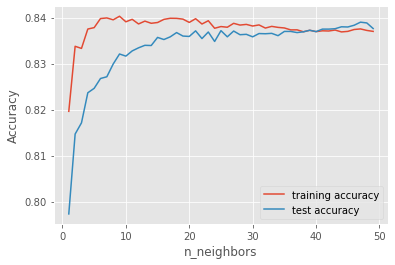

In [44]:
## se grafica para entender cual K se ajusta mejor al modelo y segun los features seleccionados 
#el modelo se ajusta mejor con una k=38 segun el grafico
import matplotlib.pyplot as plt
%matplotlib inline
neighbors_settings = range(1, 50)
for n_neighbors in neighbors_settings:
    # se construye el modelo de clasificacion
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_accuracy.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [52]:
#KNN aplicado a 3 features  y con un K=38 para obtener el Score reflejado como resultado de este codigo
#se observa una pequena mejoria en el score de test pero desmejora un poco el tiempo
t0=time.time()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,train_size=0.8)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
n_neighbors = 38
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
print('Time taken :' , time.time()-t0)

C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy of K-NN classifier on training set: 0.84
Accuracy of K-NN classifier on test set: 0.84
Time taken : 8.720805406570435


<ipython-input-53-1e712f53b1ff>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


NameError: name 'weights' is not defined

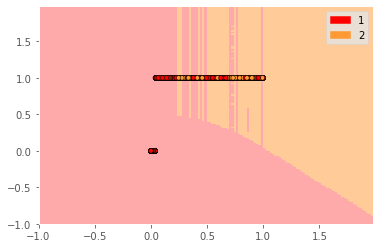

In [53]:
## se genera un grafico para ver visualmente como el modelo realiza la segregacion entre los 2 features seleccionados 
X = weather[['Rainfall','RainToday']].values
y = weather['RainTomorrow'].values

h = .02  # step size in the mesh
 
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933'])
 
# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)
 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')

plt.legend(handles=[patch0, patch1])
plt.title("5-Class classification (k = %i, weights = '%s')"
% (n_neighbors, weights))
 
plt.show()

## Prueba segundo modelo regresion logistica

In [54]:
# se cargan las librerias 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time


In [55]:
X = weather[['Rainfall','RainToday','Humidity3pm']] 
y = weather[['RainTomorrow']]

In [56]:
#Se define el train set en 80% de los datos , un test del 20%
t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
logreg = LogisticRegression(solver='liblinear').fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))
print('Time taken :' , time.time()-t0)



Training set score: 0.836
Test set score: 0.836
Time taken : 0.13259673118591309


C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

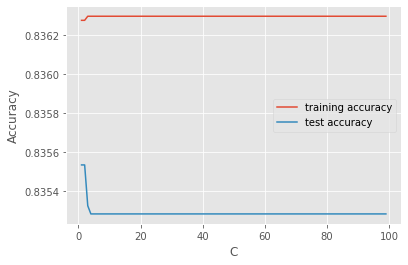

In [57]:
## se genera grafico para observar el comportamiento
import matplotlib.pyplot as plt
%matplotlib inline
training_acc = []
test_acc = []
rango = range(1, 100)
for c in rango:
    # se construye el modelo de clasificacion
    clf = LogisticRegression(C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    # se almacena el "training set accuracy"
    training_acc.append(clf.score(X_train, y_train))
    # se almacena la "generalization accuracy"
    test_acc.append(clf.score(X_test, y_test))
plt.plot(rango, training_acc, label="training accuracy")
plt.plot(rango, test_acc, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.legend()

## Prueba 3 Modelo Random Forest

In [136]:
#se cargan las librerias
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [137]:
param_grid = {
  
    'n_estimators': [100, 200, 300, 1000]
}

In [138]:
random_forest_model = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = random_forest_model , param_grid = param_grid, cv = 3, n_jobs = -1)

In [139]:
X = weather[['Rainfall','RainToday','Humidity3pm']] 
y = weather[['RainTomorrow']]

In [140]:
t0=time.time()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
rf = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
print("Training set score: {:.3f}".format(rf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(rf.score(X_test, y_test)))
print('Time taken :' , time.time()-t0)

<ipython-input-140-b34e7af0bfa2>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)


Training set score: 0.853
Test set score: 0.826
Time taken : 0.551262378692627


In [146]:
#se cambian los estimators a 120
t0=time.time()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
rf = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)
print("Training set score: {:.3f}".format(rf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(rf.score(X_test, y_test)))
print('Time taken :' , time.time()-t0)

<ipython-input-146-08c0bdbedb3d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestClassifier(n_estimators=300).fit(X_train, y_train)


Training set score: 0.854
Test set score: 0.829
Time taken : 14.794015407562256


In [135]:
#### Se utiliza el regressor pero no se obtienen buenos resultados
t0=time.time()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(rf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(rf.score(X_test, y_test)))
print('Time taken :' , time.time()-t0)

<ipython-input-135-5230f0202f2b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)


Training set score: 0.327
Test set score: 0.208
Time taken : 5.068589448928833


## Prueba 4to Modelo XGboost

In [173]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
from xgboost import XGBRegressor

#### prueba XGBOOST classifier

In [174]:
model = XGBClassifier()
model.fit(X_train, y_train)

C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[20:02:01] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [175]:
# Se calcula el accuracy
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 83.39%


C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [ ]:
#Decision Tree Classifier


t0=time.time()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train,y_train)
y_pred = clf_dt.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)
print('Time taken :' , time.time()-t0)

#### prueba XGBOOST Regressor 

In [101]:
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
# Se calcula el accuracy
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 83.23%


C:\ProgramData\Miniconda3\envs\juanca\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


## ## Prueba 5to Modelo Decision tree

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [182]:
X = weather[['Rainfall','RainToday','Humidity3pm']] 
y = weather[['RainTomorrow']]

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [184]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [187]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.854
Accuracy on test set: 0.827


In [214]:
tree = DecisionTreeClassifier(max_depth=12, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.844
Accuracy on test set: 0.833


In [213]:
tree = DecisionTreeClassifier(min_samples_split=25, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.845
Accuracy on test set: 0.832


## Evaluacion de modelos

Todos los modelos presentan un accuracy entre el 82% y el 84% teniendo un mejor Score el KNN,sin embargo presenta un tiempo de respuesta y procesamiento computacional bastante grande en consideracion con el randomForest y el Decision tree.. en este caso el modelo que mejor ajusta y muestra un menor consumo computacional es el decision tree